In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [230]:
pd.set_option('display.max_columns', None)

In [231]:
url = 'https://www.fundsexplorer.com.br/ranking'

In [232]:
response = requests.get(url)
if response.status_code == 200:
    df = pd.read_html(response.content, encoding='utf-8')[0]

In [233]:
df.sort_values(by='Códigodo fundo', inplace=True)

In [234]:
df.reset_index(drop=True, inplace=True)

In [235]:
df.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,DY (6M)Média,DY (12M)Média,DY Ano,Variação Preço,Rentab.Período,Rentab.Acumulada,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,ABCP11,Shoppings,"R$ 69,25",612.0,"R$ 0,42","0,61%","1,89%","3,16%","5,86%","0,63%","0,53%","0,49%","4,47%","-5,78%","-5,21%","-7,11%","R$ 1.080.690.326,04","R$ 88,55",78.0,"0,47%","0,15%","0,62%","3,47%","8,40%",NaN,1
1,AFCR11,Híbrido,"R$ 104,40",15456.0,"R$ 1,18","1,13%","3,17%","6,45%","11,60%","1,06%","1,08%","0,97%","9,11%","-1,61%","-0,50%","-0,61%","R$ 140.621.755,76","R$ 102,10",102.0,"1,06%","-0,04%","1,02%","5,37%",NaN,NaN,0
2,AFHI11,Títulos e Val. Mob.,"R$ 92,29",11024.0,"R$ 1,00","1,05%","2,93%","0,00%","0,00%","0,98%","0,00%","0,00%","3,56%","-0,86%","0,19%","3,12%","R$ 172.876.618,28","R$ 96,70",95.0,"1,03%","-0,38%","0,65%","1,92%",NaN,NaN,0
3,AFOF11,Títulos e Val. Mob.,"R$ 87,97",2623.0,"R$ 0,67","0,73%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,73%","-3,74%","-3,03%","-3,03%","R$ 67.805.605,75","R$ 98,10",90.0,"0,68%","-2,65%","-1,98%","-6,65%",NaN,NaN,0
4,AIEC11,Lajes Corporativas,"R$ 81,00",4318.0,"R$ 0,61","0,75%","2,21%","4,18%","0,00%","0,74%","0,70%","0,00%","6,02%","-0,49%","0,26%","-8,00%","R$ 484.941.482,42","R$ 100,51",81.0,"0,61%","0,18%","0,79%","3,27%","0,00%",NaN,2


In [236]:
df.columns

Index(['Códigodo fundo', 'Setor', 'Preço Atual', 'Liquidez Diária',
       'Dividendo', 'DividendYield', 'DY (3M)Acumulado', 'DY (6M)Acumulado',
       'DY (12M)Acumulado', 'DY (3M)Média', 'DY (6M)Média', 'DY (12M)Média',
       'DY Ano', 'Variação Preço', 'Rentab.Período', 'Rentab.Acumulada',
       'PatrimônioLíq.', 'VPA', 'P/VPA', 'DYPatrimonial',
       'VariaçãoPatrimonial', 'Rentab. Patr.no Período',
       'Rentab. Patr.Acumulada', 'VacânciaFísica', 'VacânciaFinanceira',
       'QuantidadeAtivos'],
      dtype='object')

In [237]:
df.Setor.unique()

array(['Shoppings', 'Híbrido', 'Títulos e Val. Mob.',
       'Lajes Corporativas', 'Logística', 'Outros', 'Residencial',
       'Hospital', 'Hotel'], dtype=object)

In [238]:
df.isna().sum()

Códigodo fundo               0
Setor                        0
Preço Atual                  7
Liquidez Diária              7
Dividendo                    0
DividendYield               12
DY (3M)Acumulado            12
DY (6M)Acumulado            12
DY (12M)Acumulado           12
DY (3M)Média                12
DY (6M)Média                12
DY (12M)Média               12
DY Ano                      24
Variação Preço              12
Rentab.Período              12
Rentab.Acumulada            12
PatrimônioLíq.               0
VPA                          0
P/VPA                        7
DYPatrimonial               34
VariaçãoPatrimonial         34
Rentab. Patr.no Período     34
Rentab. Patr.Acumulada      34
VacânciaFísica             129
VacânciaFinanceira         224
QuantidadeAtivos             0
dtype: int64

In [239]:
features_categoricas = ['Códigodo fundo', 'Setor']

In [240]:
df[features_categoricas] = df[features_categoricas].astype('category')

In [241]:
df[features_categoricas].isna().sum()

Códigodo fundo    0
Setor             0
dtype: int64

In [242]:
features_numericas = list(df.iloc[:,2:-1].columns)

In [243]:
df[features_numericas] = df[features_numericas].fillna(value=0)

In [244]:
df[features_numericas].isna().sum()

Preço Atual                0
Liquidez Diária            0
Dividendo                  0
DividendYield              0
DY (3M)Acumulado           0
DY (6M)Acumulado           0
DY (12M)Acumulado          0
DY (3M)Média               0
DY (6M)Média               0
DY (12M)Média              0
DY Ano                     0
Variação Preço             0
Rentab.Período             0
Rentab.Acumulada           0
PatrimônioLíq.             0
VPA                        0
P/VPA                      0
DYPatrimonial              0
VariaçãoPatrimonial        0
Rentab. Patr.no Período    0
Rentab. Patr.Acumulada     0
VacânciaFísica             0
VacânciaFinanceira         0
dtype: int64

In [245]:
df['Liquidez Diária'] = df['Liquidez Diária'].apply(lambda x: str(x).replace('.0',''))
df[features_numericas] = df[features_numericas].applymap(lambda x: str(x).replace('R$','').replace('%','').replace('.','').replace(',','.'))

In [246]:
df[features_numericas].head()

,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,DY (6M)Média,DY (12M)Média,DY Ano,Variação Preço,Rentab.Período,Rentab.Acumulada,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira
0,69.25,612,0.42,0.61,1.89,3.16,5.86,0.63,0.53,0.49,4.47,-5.78,-5.21,-7.11,1080690326.04,88.55,780,0.47,0.15,0.62,3.47,8.40,0
1,104.40,15456,1.18,1.13,3.17,6.45,11.60,1.06,1.08,0.97,9.11,-1.61,-0.50,-0.61,140621755.76,102.10,1020,1.06,-0.04,1.02,5.37,0,0
2,92.29,11024,1.00,1.05,2.93,0.00,0.00,0.98,0.00,0.00,3.56,-0.86,0.19,3.12,172876618.28,96.70,950,1.03,-0.38,0.65,1.92,0,0
3,87.97,2623,0.67,0.73,0.00,0.00,0.00,0.00,0.00,0.00,0.73,-3.74,-3.03,-3.03,67805605.75,98.10,900,0.68,-2.65,-1.98,-6.65,0,0
4,81.00,4318,0.61,0.75,2.21,4.18,0.00,0.74,0.70,0.00,6.02,-0.49,0.26,-8.00,484941482.42,100.51,810,0.61,0.18,0.79,3.27,0.00,0


In [247]:
df[features_numericas] = df[features_numericas].astype('float')

In [248]:
df['P/VPA'] = df['P/VPA'] / 1000

In [249]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Preço Atual,250.0,4.257879e+02,4.671964e+03,0.00,7.139250e+01,9.169500e+01,1.039150e+02,7.390000e+04
Liquidez Diária,250.0,1.552393e+04,4.763383e+04,0.00,2.452500e+02,2.674000e+03,1.467875e+04,6.431230e+05
Dividendo,250.0,1.164680e+00,2.941400e+00,0.00,4.800000e-01,6.500000e-01,9.075000e-01,2.905000e+01
DividendYield,250.0,7.858800e-01,2.282476e+00,0.00,5.200000e-01,6.950000e-01,8.400000e-01,3.632000e+01
DY (3M)Acumulado,250.0,1.959800e+00,2.494923e+00,0.00,1.522500e+00,1.990000e+00,2.460000e+00,3.799000e+01
DY (6M)Acumulado,250.0,3.466560e+00,3.176416e+00,0.00,1.925000e+00,3.690000e+00,4.717500e+00,4.096000e+01
DY (12M)Acumulado,250.0,5.365160e+00,5.263817e+00,0.00,0.000000e+00,6.005000e+00,8.430000e+00,4.522000e+01
DY (3M)Média,250.0,6.535200e-01,8.314948e-01,0.00,5.100000e-01,6.600000e-01,8.200000e-01,1.266000e+01
DY (6M)Média,250.0,5.776000e-01,5.294195e-01,0.00,3.175000e-01,6.100000e-01,7.875000e-01,6.830000e+00
DY (12M)Média,250.0,4.470800e-01,4.387375e-01,0.00,0.000000e+00,5.000000e-01,7.000000e-01,3.770000e+00


In [250]:
indicadores = ['Códigodo fundo', 'Setor','Preço Atual','Dividendo','DividendYield','Liquidez Diária','DY (12M)Acumulado','P/VPA','VacânciaFísica', 'VacânciaFinanceira','QuantidadeAtivos']

In [251]:
df_indicadores = df[indicadores]

In [252]:
media_por_setor = df_indicadores.groupby('Setor').agg(['mean', 'std'])
media_por_setor.loc['Residencial', ('DY (12M)Acumulado', 'mean')]

5.132

In [253]:
media_por_setor

Preço Atual               Dividendo            \
                            mean           std      mean       std   
Setor                                                                
Hospital              212.090000    195.534027  1.670000  1.513968   
Hotel                  94.773333      5.855086  0.313333  0.300888   
Híbrido              2028.958684  11974.358441  0.868684  1.117677   
Lajes Corporativas    204.854250    415.599716  1.388250  4.449885   
Logística             123.416190     71.529321  0.756190  0.291213   
Outros                122.110811    174.196876  1.526757  2.733557   
Residencial            47.914000     42.382077  3.219000  9.080688   
Shoppings             254.825000    504.736247  1.447727  3.372015   
Títulos e Val. Mob.    92.587632     75.924612  0.793026  0.334010   

                    DividendYield            Liquidez Diária                 \
                             mean        std            mean            std   
Setor                                                                         
Hospital                 0.470000   0.428836      581.333333     930.882556   
Hotel                    0.343333   0.318800    17958.333333   27291.036575   
Híbrido                  0.606579   0.325911    28724.421053  105415.217079   
Lajes Corporativas       0.474500   0.312984     5443.800000    9587.863384   
Logística                0.656667   0.171591    11967.523810   14620.848329   
Outros                   0.768108   0.375920    16853.567568   36395.720011   
Residencial              3.848000  11.414838      984.200000    1163.633848   
Shoppings                0.410000   0.247944     8647.909091   11402.668651   
Títulos e Val. Mob.      0.819605   0.281176    18961.671053   32306.864719   

                    DY (12M)Acumulado                P/VPA            \
                                 mean        std      mean       std   
Setor                                                                  
Hospital                     5.053333   4.476129  1.116667  0.177858   
Hotel                        4.326667   3.899543  0.923333  0.140119   
Híbrido                      4.925789   4.454954  0.771579  0.422403   
Lajes Corporativas           5.336250   5.101143  0.817000  0.561460   
Logística                    4.889048   3.260718  0.908571  0.117145   
Outros                       6.199189   5.376703  0.853514  0.310521   
Residencial                  5.132000  14.215344  0.976000  0.536785   
Shoppings                    2.964545   2.293408  0.730455  0.201246   
Títulos e Val. Mob.          6.104474   4.742449  0.927763  0.177310   

                    VacânciaFísica            VacânciaFinanceira             \
                              mean        std               mean        std   
Setor                                                                         
Hospital                  0.000000   0.000000           0.000000   0.000000   
Hotel                    40.966667  36.059719           0.000000   0.000000   
Híbrido                   3.721842   8.508563           1.162632   3.454974   
Lajes Corporativas       28.231750  30.596818           5.457500  17.864134   
Logística                 5.338095  13.469353           0.600000   1.876166   
Outros                    2.359459   8.470716           0.164865   0.734172   
Residencial               3.230000   9.113854           0.000000   0.000000   
Shoppings                10.894545  11.890457           0.000000   0.000000   
Títulos e Val. Mob.       0.000000   0.000000           0.000000   0.000000   

                    QuantidadeAtivos             
                                mean        std  
Setor                                            
Hospital                    1.000000   0.000000  
Hotel                       9.333333  12.096832  
Híbrido                     4.500000   6.450435  
Lajes Corporativas          4.150000  10.388727  
Logística                   7.476190   5.473747  
Outros           

In [254]:
def oportunidade(df, setor, label_setor='Setor'):
    media_setor = df_indicadores.groupby('Setor').agg(['mean', 'std'])
    df_setor = df[df[label_setor].isin([setor])]
    
    filtro_ = (df_setor['QuantidadeAtivos'] > 5) & (df_setor['Liquidez Diária'] > 500) & \
              (df_setor['P/VPA'] < 1.0 ) & (df_setor['DY (12M)Acumulado'] > media_setor.loc[setor, ('DY (12M)Acumulado', 'mean')])

    return df_setor[filtro_]

In [255]:
list(df.Setor.unique())

['Shoppings',
 'Híbrido',
 'Títulos e Val. Mob.',
 'Lajes Corporativas',
 'Logística',
 'Outros',
 'Residencial',
 'Hospital',
 'Hotel']

In [256]:
df_oportunidade = pd.DataFrame()

for i in list(df.Setor.unique()):
    df_oportunidade = pd.concat([df_oportunidade, oportunidade(df_indicadores, setor=i)]).reset_index(drop=True)

In [257]:
df_oportunidade.sort_values(by='DividendYield').head(10)

,Códigodo fundo,Setor,Preço Atual,Dividendo,DividendYield,Liquidez Diária,DY (12M)Acumulado,P/VPA,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
22,HTMX11,Hotel,101.51,0.00,0.00,4405.0,5.41,0.78,55.00,0.00,23
0,HGBS11,Shoppings,182.09,0.85,0.47,14748.0,3.54,0.85,8.00,0.00,17
6,KNRI11,Híbrido,147.00,0.77,0.52,35737.0,5.51,0.93,8.54,11.78,20
8,HGRE11,Lajes Corporativas,130.85,0.69,0.53,13178.0,6.47,0.77,23.44,24.95,21
3,XPML11,Shoppings,95.80,0.57,0.56,38408.0,4.60,0.92,5.20,0.00,13
19,RBRP11,Outros,74.26,0.43,0.56,16588.0,6.28,0.86,8.00,4.00,17
2,VISC11,Shoppings,102.60,0.58,0.57,21617.0,4.85,0.86,8.30,0.00,15
7,RECT11,Híbrido,67.88,0.44,0.58,16626.0,8.70,0.73,33.20,0.00,8
10,BRCO11,Logística,98.45,0.57,0.58,28958.0,6.02,0.91,2.70,2.00,10
15,XPLG11,Logística,102.25,0.62,0.61,41329.0,6.24,0.93,11.30,1.80,13


In [258]:
#!pip install pandas_datareader

In [259]:
from pandas_datareader import data as web

In [260]:
fundos = list(df_oportunidade['Códigodo fundo'].unique())
start = '01-01-2019'
end = '10-01-2021'

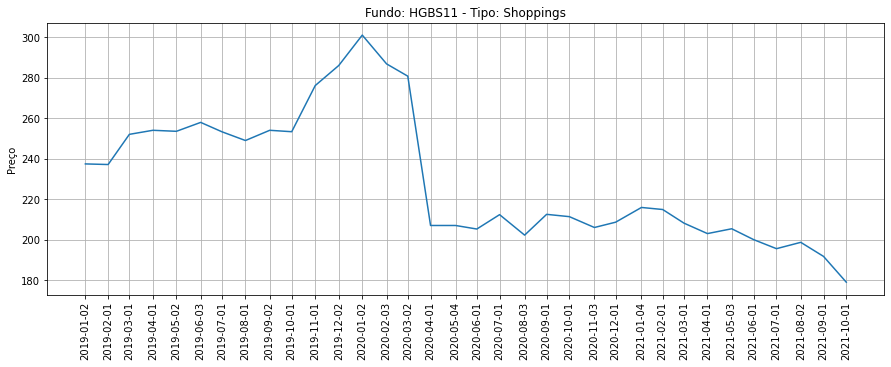

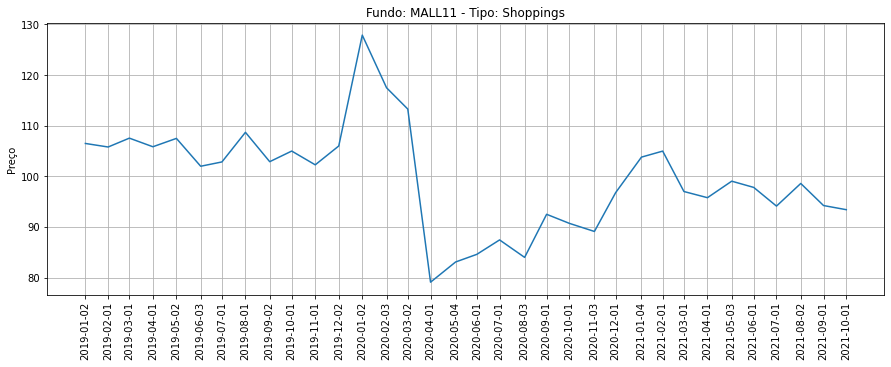

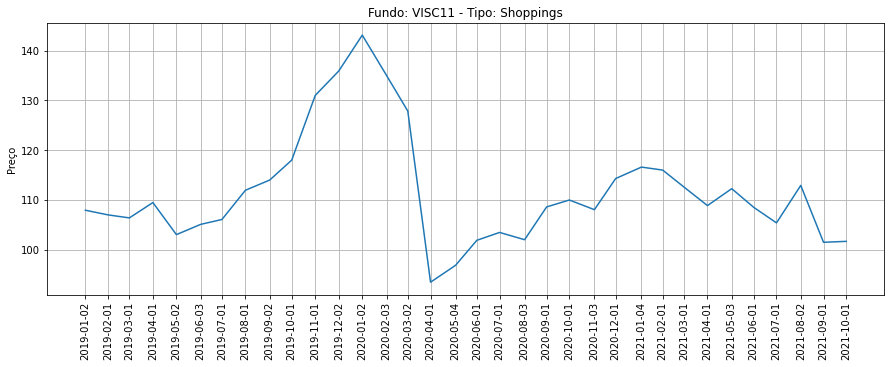

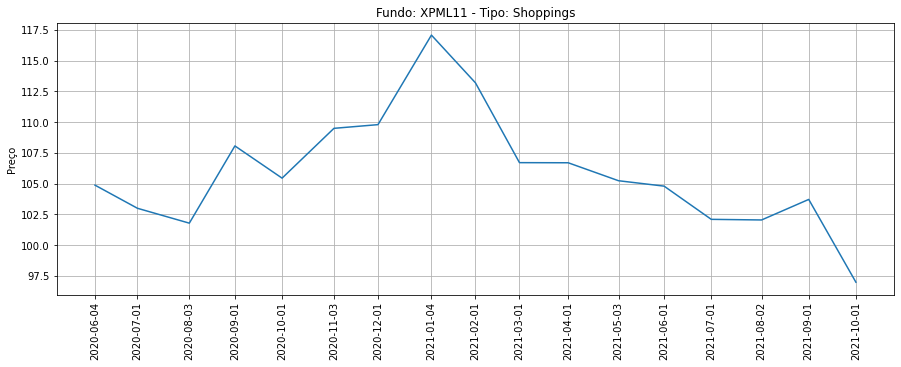

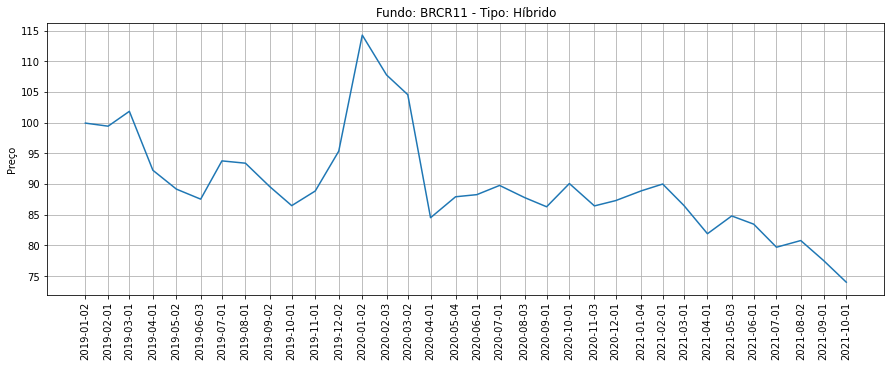

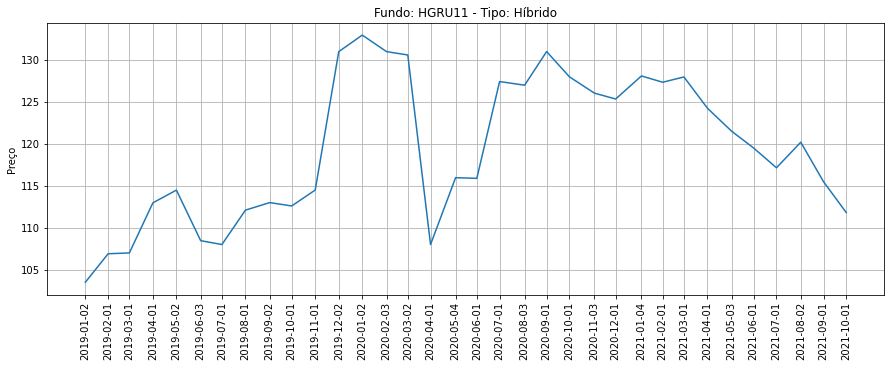

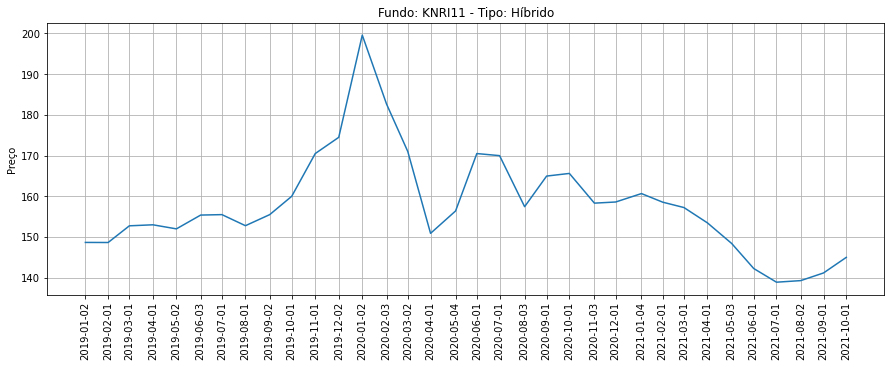

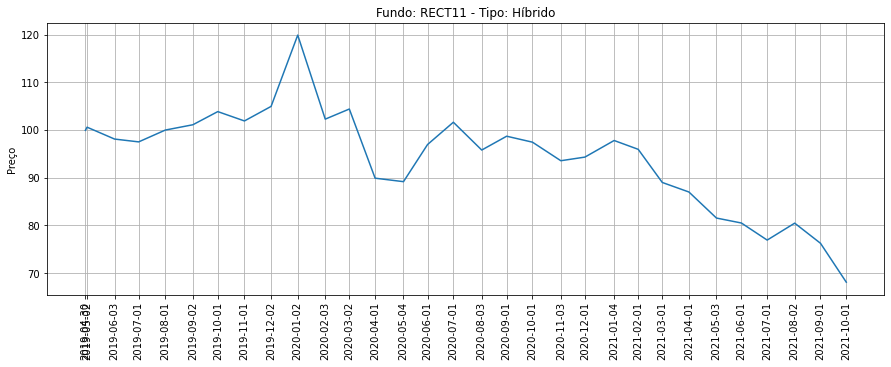

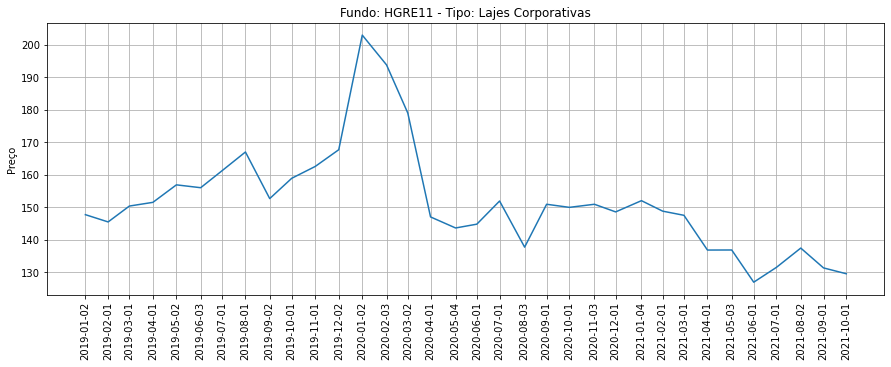

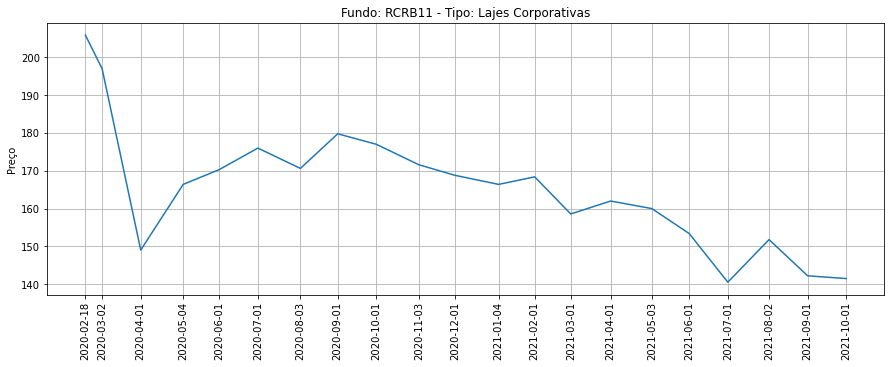

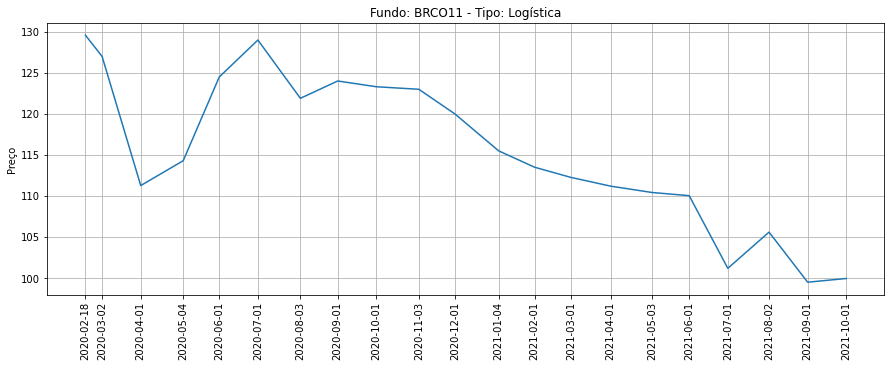

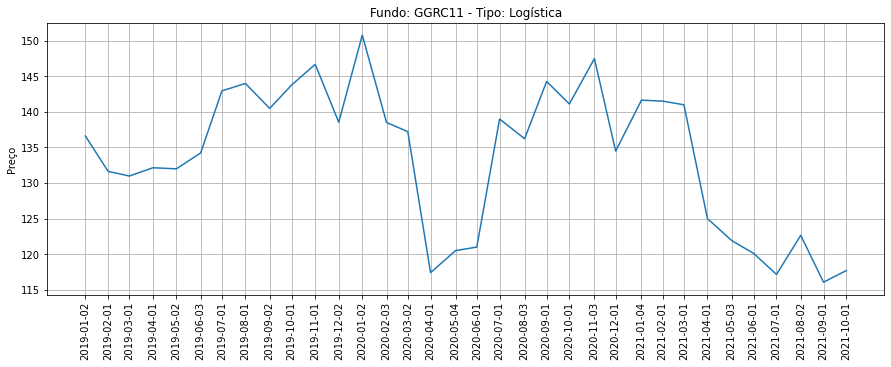

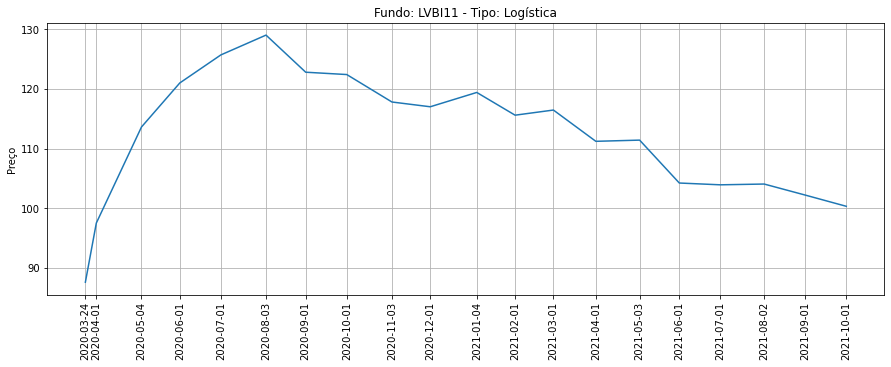

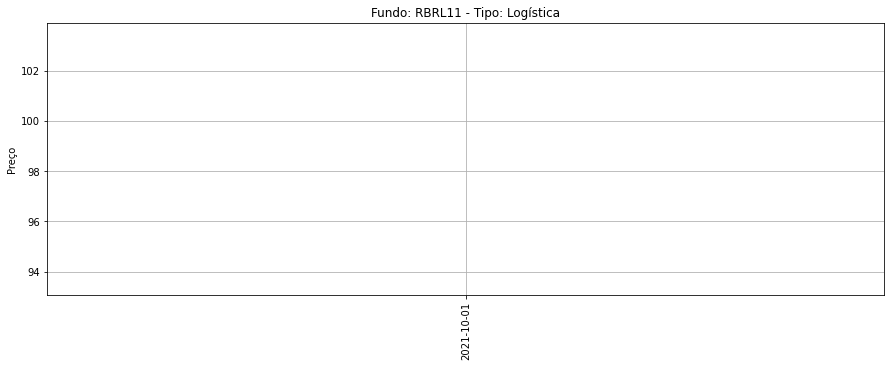

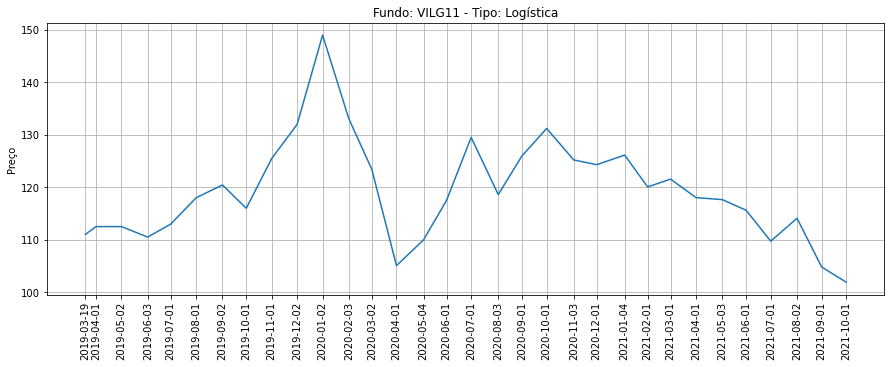

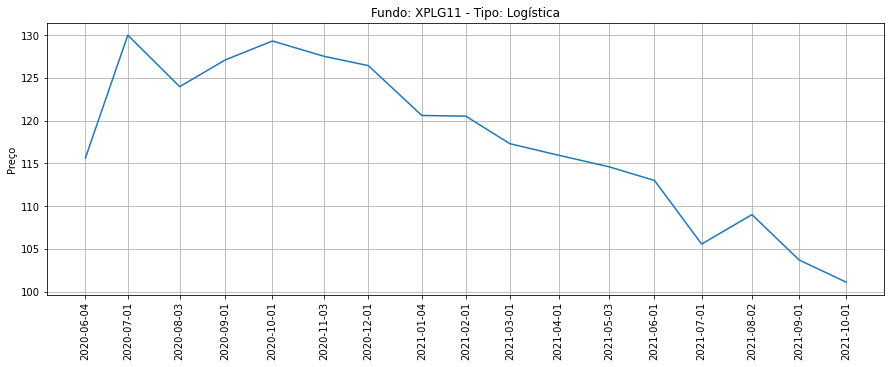

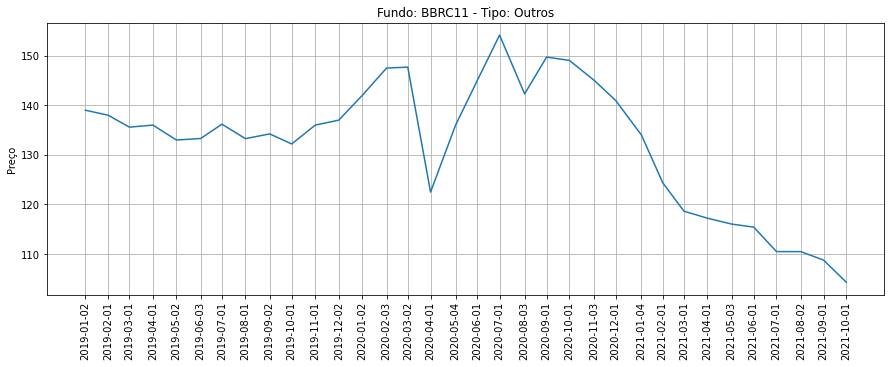

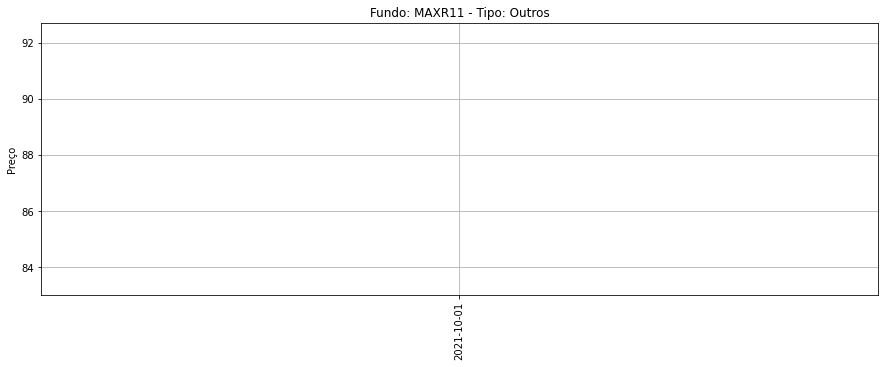

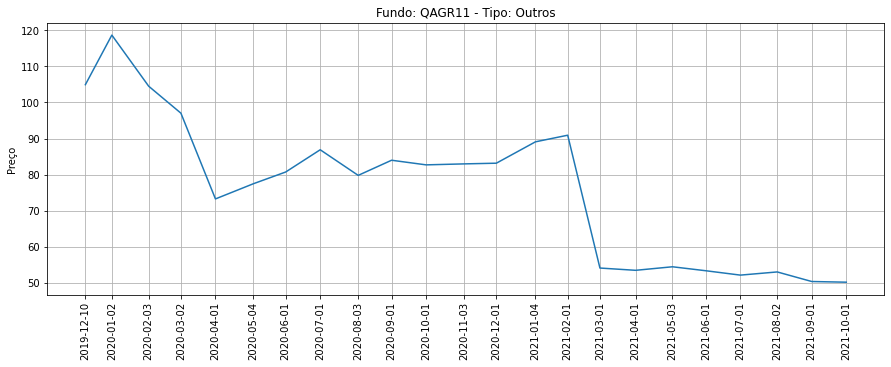

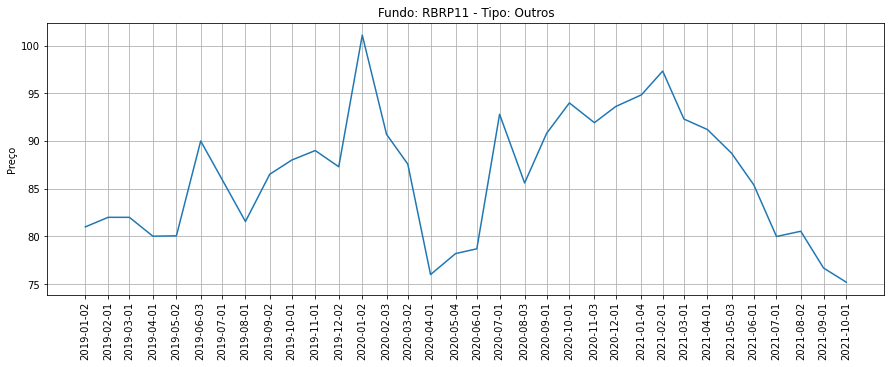

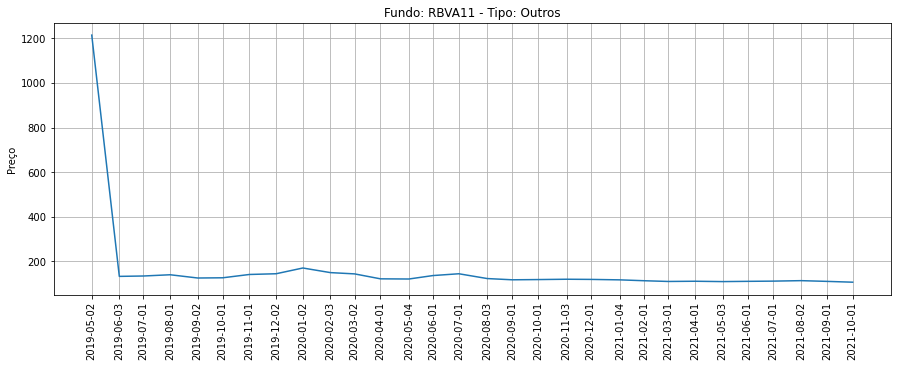

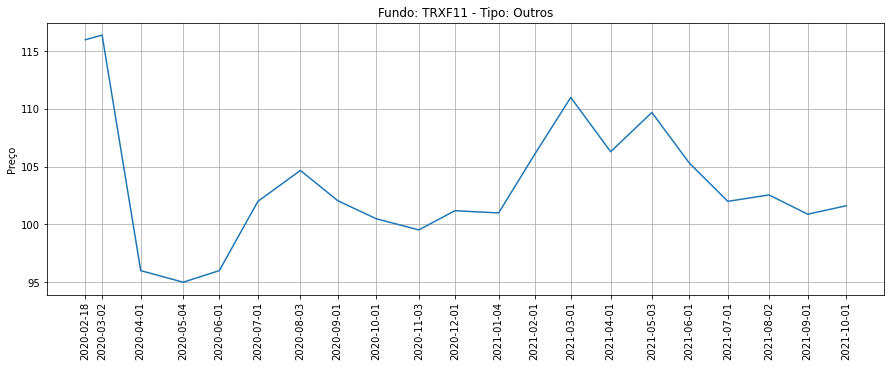

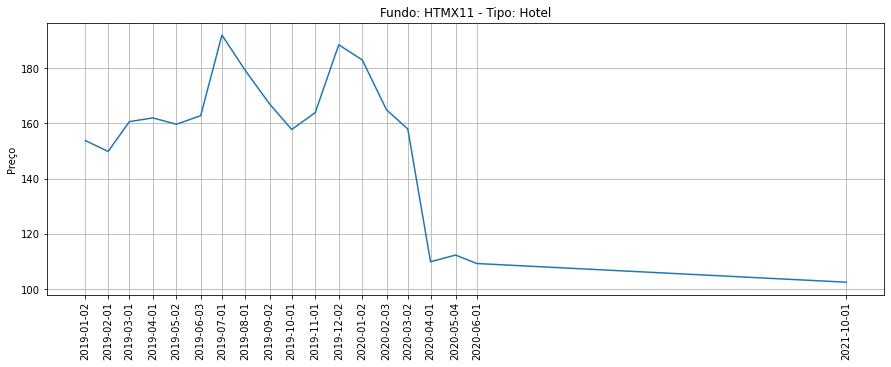

In [276]:
i=0

for fundo in fundos:
    df_fundos_mes = pd.DataFrame()
    df_temp = pd.DataFrame()
    df_fundos = web.DataReader((fundo + '.SA'), data_source='yahoo', start=start, end=end)
    for year in df_fundos.index.year.unique():
        for month in df_fundos.index.month.unique().sort_values():
            df_temp = df_fundos.loc[(df_fundos.index.month == month) & (df_fundos.index.year == year)].head(1)
            df_fundos_mes = pd.concat([df_fundos_mes, df_temp])
            
    plt.figure(figsize=(15,5))
    plt.plot(df_fundos_mes["Adj Close"])
    plt.xticks(df_fundos_mes.index, rotation=90)
    plt.ylabel("Preço")
    plt.title('Fundo: {} - Tipo: {}'.format(fundo, df_oportunidade.loc[df_oportunidade['Códigodo fundo'] == fundo]['Setor'][i]))
    plt.grid()
    plt.show()
    i +=1

In [286]:
df_oportunidade

,Códigodo fundo,Setor,Preço Atual,Dividendo,DividendYield,Liquidez Diária,DY (12M)Acumulado,P/VPA,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,HGBS11,Shoppings,182.09,0.85,0.47,14748.0,3.54,0.85,8.00,0.00,17
1,MALL11,Shoppings,93.98,0.57,0.61,11307.0,6.49,0.90,2.00,0.00,7
2,VISC11,Shoppings,102.60,0.58,0.57,21617.0,4.85,0.86,8.30,0.00,15
3,XPML11,Shoppings,95.80,0.57,0.56,38408.0,4.60,0.92,5.20,0.00,13
4,BRCR11,Híbrido,73.79,0.46,0.63,43518.0,6.66,0.69,24.80,11.60,14
5,HGRU11,Híbrido,113.00,0.72,0.64,38749.0,7.00,0.96,0.00,0.00,16
6,KNRI11,Híbrido,147.00,0.77,0.52,35737.0,5.51,0.93,8.54,11.78,20
7,RECT11,Híbrido,67.88,0.44,0.58,16626.0,8.70,0.73,33.20,0.00,8
8,HGRE11,Lajes Corporativas,130.85,0.69,0.53,13178.0,6.47,0.77,23.44,24.95,21
9,RCRB11,Lajes Corporativas,142.00,0.95,0.67,9852.0,6.21,0.72,14.40,0.00,10
